In [57]:
# Import Libraries

# Data 
from google.colab import files

# General
import numpy as np
import pandas as pd
import datetime

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Regression 
import statsmodels.formula.api as smf                 # for ols and logit

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler      # Remove Mean and scale to Unit Variance
from sklearn.preprocessing import PowerTransformer    # Log Transformation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#map
import folium
from folium.plugins import HeatMap
import plotly.express as px

#
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from google.colab import drive


drive.mount('/content/drive')
bra_path='drive/MyDrive/IS3107/hotel_bookings.csv'
# use your path
jy_path=''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#HOTEL BOOKING (July 2015 - 2017 August)

In [36]:
csv = open(bra_path)
# csv = open(jy_path)
hotel_booking_df = pd.read_csv(csv)

In [4]:
hotel_booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
hotel_booking_df = hotel_booking_df.drop(['agent', 'company', 'distribution_channel'], axis=1)

In [6]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotel_booking_df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

##EDA

In [10]:
df = hotel_booking_df.copy().reset_index().drop(['index'],axis=1)

In [11]:
resort_df = df[df['hotel'] == 'Resort Hotel']
city_df = df[df['hotel'] == 'City Hotel']

Guest Origin

In [12]:
country_resort = df[df['hotel'] == 'Resort Hotel']['country'].value_counts().reset_index()
country_resort.columns = ['country', 'sum']
country_city = df[df['hotel'] == 'City Hotel']['country'].value_counts().reset_index()
country_city.columns = ['country', 'sum']

In [13]:
# Resort Hotel Guests Origin
basemap = folium.Map()
guests_map = px.choropleth(country_resort, locations = country_resort['country'],
                           color = country_resort['sum'], hover_name = country_resort['country'])
guests_map.show()

In [14]:
# City Hotel Guests Origin
basemap = folium.Map()
guests_map = px.choropleth(country_city, locations = country_city['country'],
                           color = country_city['sum'], hover_name = country_city['country'])
guests_map.show()

Arrival Trend

In [15]:
month_sorter = city_df[ city_df['arrival_date_year'] == 2016]['arrival_date_month'].unique()

In [16]:
all_months = np.concatenate( (city_df[ city_df['arrival_date_year'] == 2017]['arrival_date_month'].unique() ,
                              city_df[ city_df['arrival_date_year'] == 2016]['arrival_date_month'].unique() ,
                              city_df[ city_df['arrival_date_year'] == 2015]['arrival_date_month'].unique()))

all_months_count = pd.Series(all_months).value_counts()
monthly_arr_city = city_df.groupby('arrival_date_month')['hotel'].count()
mean_monthly_arr_city_temp= monthly_arr_city / all_months_count
mean_monthly_arr_city = mean_monthly_arr_city_temp[month_sorter].reset_index()
mean_monthly_arr_city.columns = ['month', 'arrival']

In [17]:
monthly_arr_resort = resort_df.groupby('arrival_date_month')['hotel'].count()
mean_monthly_arr_resort_temp = monthly_arr_resort / all_months_count
mean_monthly_arr_resort = mean_monthly_arr_resort_temp[month_sorter].reset_index()
mean_monthly_arr_resort.columns = ['month', 'arrival']

In [18]:
mean_monthly_arr_combined = mean_monthly_arr_resort.merge(mean_monthly_arr_city, on='month')
mean_monthly_arr_combined.columns = ['month', 'resort_arrival', 'city_arrival']
mean_monthly_arr_combined

,month,resort_arrival,city_arrival
0,January,1096.500000,1868.000000
1,February,1551.500000,2482.500000
2,March,1668.000000,3229.000000
3,April,1804.500000,3740.000000
4,May,1779.500000,4116.000000
5,June,1522.500000,3947.000000
6,July,1524.333333,2696.000000
7,August,1631.333333,2994.333333
8,September,1554.000000,3700.000000
9,October,1777.500000,3802.500000


<AxesSubplot:xlabel='month', ylabel='Arrival'>

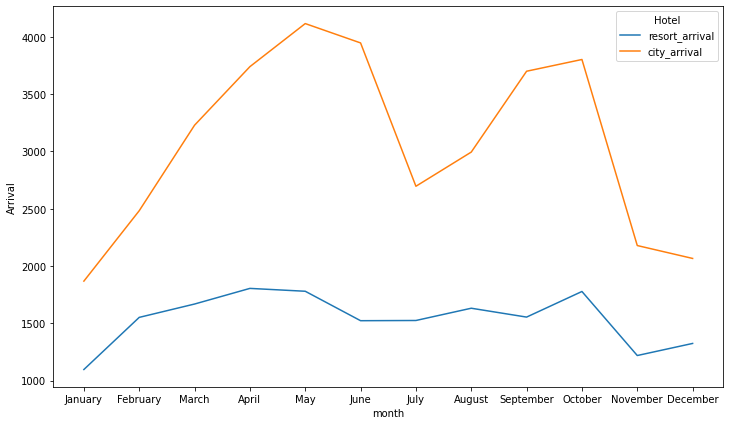

In [19]:
plt.figure(figsize = (12,7))

sns.lineplot(data=pd.melt(mean_monthly_arr_combined, ['month'], var_name='Hotel', value_name='Arrival'), x='month', y='Arrival', hue='Hotel')

Cancellation Trend

In [20]:
cancel_city = city_df[city_df['is_canceled'] == 1]
monthly_cancel_city = cancel_city.groupby('arrival_date_month')['hotel'].count()
monthly_cancel_city= monthly_cancel_city / all_months_count
monthly_cancel_city = monthly_cancel_city / mean_monthly_arr_city_temp
monthly_cancel_city = monthly_cancel_city[month_sorter].reset_index()
monthly_cancel_city.columns = ['month', '%cancel']

In [21]:
cancel_resort = resort_df[resort_df['is_canceled'] == 1]
monthly_cancel_resort = cancel_resort.groupby('arrival_date_month')['hotel'].count()
monthly_cancel_resort= monthly_cancel_resort / all_months_count
monthly_cancel_resort = monthly_cancel_resort / mean_monthly_arr_resort_temp
monthly_cancel_resort = monthly_cancel_resort[month_sorter].reset_index()
monthly_cancel_resort.columns = ['month', '%cancel']

In [22]:
mean_monthly_cancel_combined = monthly_cancel_resort.merge(monthly_cancel_city, on='month')
mean_monthly_cancel_combined.columns = ['month', 'resort', 'city']
mean_monthly_cancel_combined

,month,resort,city
0,January,0.148199,0.396681
1,February,0.256204,0.382880
2,March,0.228717,0.369464
3,April,0.293433,0.463235
4,May,0.287721,0.443756
5,June,0.330706,0.446922
6,July,0.314017,0.408754
7,August,0.334491,0.400980
8,September,0.323681,0.420270
9,October,0.275105,0.429717


<AxesSubplot:xlabel='month', ylabel='%cancel'>

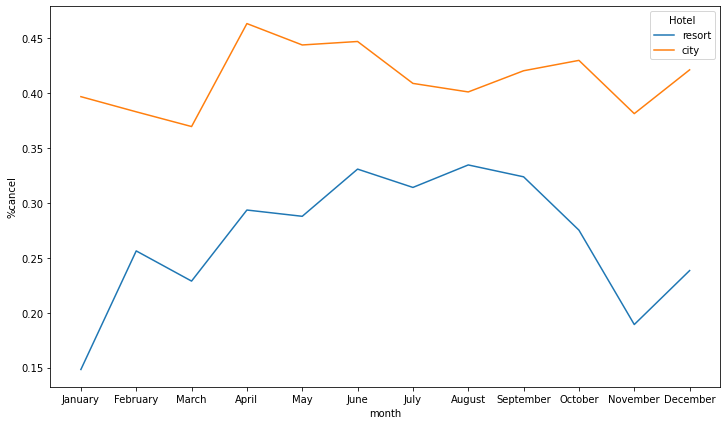

In [23]:
plt.figure(figsize = (12,7))

sns.lineplot(data=pd.melt(mean_monthly_cancel_combined, ['month'], var_name='Hotel', value_name='%cancel'), x='month', y='%cancel', hue='Hotel')

Price Trend

In [24]:
resort_df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [25]:
city_df['reserved_room_type'].unique()

array(['A', 'B', 'D', 'F', 'E', 'G', 'C', 'P'], dtype=object)

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

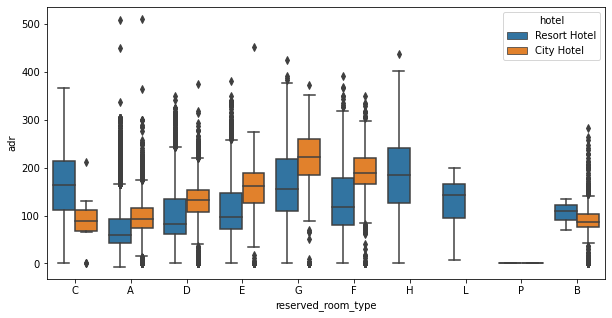

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(data=df[df['adr'] < 1000], x='reserved_room_type', y='adr', hue='hotel', ax=ax)

Price Trend

In [27]:
mean_monthly_price_resort = resort_df.groupby(['arrival_date_month'])['adr'].mean()
mean_monthly_price_resort = mean_monthly_price_resort[month_sorter].reset_index()
mean_monthly_price_resort.columns = ['arrival_month', 'adr']

In [28]:
mean_monthly_price_city = city_df.groupby(['arrival_date_month'])['adr'].mean()
mean_monthly_price_city = mean_monthly_price_city[month_sorter].reset_index()
mean_monthly_price_city.columns = ['arrival_month', 'adr']

In [29]:
mean_monthly_price_combined = mean_monthly_price_resort.merge(mean_monthly_price_city, on='arrival_month')
mean_monthly_price_combined.columns = ['arrival_month', 'resort_price', 'city_price']

In [30]:
mean_monthly_price_combined

,arrival_month,resort_price,city_price
0,January,49.461883,82.628986
1,February,55.171930,85.088278
2,March,57.520147,92.643116
3,April,77.849496,111.251838
4,May,78.758134,121.638560
5,June,110.444749,119.074341
6,July,155.181299,110.734292
7,August,186.790574,114.680455
8,September,93.252030,110.004661
9,October,62.097617,99.974498


<AxesSubplot:xlabel='arrival_month', ylabel='Price'>

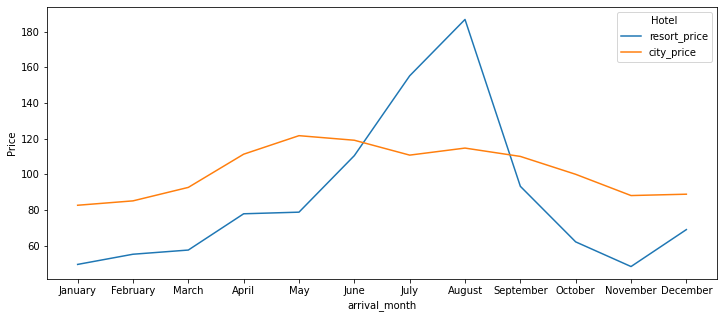

In [31]:
plt.figure(figsize = (12,5))

sns.lineplot(data=pd.melt(mean_monthly_price_combined, ['arrival_month'], var_name='Hotel', value_name='Price'), x='arrival_month', y='Price', hue='Hotel')

Length of stay

In [32]:
df_nc = df[df['is_canceled'] == 0].copy()
df_nc['num_nights'] = df_nc['stays_in_weekend_nights'] + df_nc['stays_in_week_nights']
df_nc = sd.Sort_Dataframeby_Month(df_nc, 'arrival_date_month')

<AxesSubplot:xlabel='num_nights', ylabel='count'>

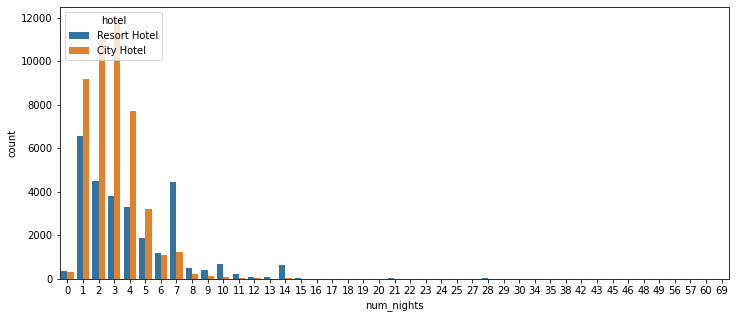

In [33]:
plt.figure(figsize = (12,5))
sns.countplot(data=df_nc, x="num_nights", hue='hotel')

<AxesSubplot:xlabel='arrival_date_month', ylabel='num_nights'>

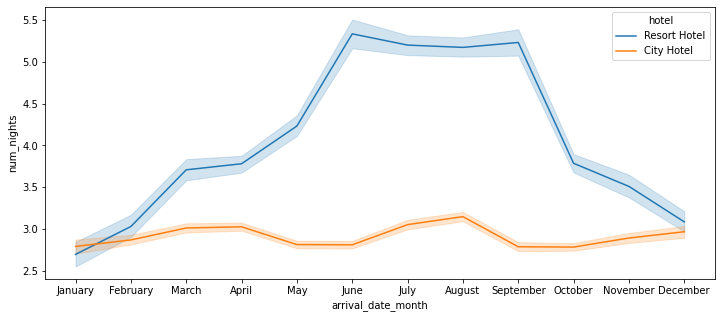

In [34]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_nc, x='arrival_date_month', y='num_nights', hue='hotel' , sort=False)

#HOTEL RESERVATION (July 2017 - December 2018)

In [71]:
bra_path1='drive/MyDrive/IS3107/hotel_reservations.csv'
csv1 = open(bra_path1)
hotel_reservation_df = pd.read_csv(csv1)

In [72]:
hotel_reservation_df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [73]:
hotel_reservation_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [74]:
hotel_reservation_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [75]:
hotel_reservation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [79]:
len(hotel_reservation_df)

36275

In [80]:
temp_add = pd.Series(["-"] * len(hotel_reservation_df))

In [92]:
def generate_date(string):
  list1 = string.split("-")
  list1 = list(map(lambda x : int(x), list1))
  if (list1[1] == 2 and list1[2] > 28) :
    return datetime.datetime(2018,2,28)
  return datetime.datetime(list1[0], list1[1], list1[2])

In [101]:
df1 = hotel_reservation_df
df1 = df1.sort_values(['arrival_year', 'arrival_month', 'arrival_date']).reset_index().drop('index',axis=1)
df1 = df1.astype({'arrival_year': str, 'arrival_month': str, 'arrival_date': str})
df1['arr_date'] = df1['arrival_year'] + temp_add + df1['arrival_month'] + temp_add + df1['arrival_date']
df1['arr_date'] = df1['arr_date'].apply(generate_date)
df1 = df1.astype(({'arrival_year': int, 'arrival_month': int, 'arrival_date': int}))

df1['timedelta'] = df1['lead_time'].apply(lambda x: datetime.timedelta(days = x))
df1['booking_date'] = df1['arr_date'] - df1['timedelta']


In [107]:
sorted_by_booking = df1.copy().sort_values('booking_date').reset_index().drop('index',axis=1)